### Visualizing dataset

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
from keras.preprocessing.image import ImageDataGenerator, load_img
%matplotlib inline

Using TensorFlow backend.


In [53]:
image_visulaization =ImageDataGenerator(rescale=1/255)
image_visulaization.flow_from_directory("car_data/train/")

Found 8144 images belonging to 196 classes.


In [23]:
train_folder = glob.glob("car_data/train/*")
for i, name in enumerate(train_folder):
    print("%i."%i, name[15:],"\n")

0. Acura Integra Type R 2001 

1. Acura RL Sedan 2012 

2. Acura TL Sedan 2012 

3. Acura TL Type-S 2008 

4. Acura TSX Sedan 2012 

5. Acura ZDX Hatchback 2012 

6. AM General Hummer SUV 2000 

7. Aston Martin V8 Vantage Convertible 2012 

8. Aston Martin V8 Vantage Coupe 2012 

9. Aston Martin Virage Convertible 2012 

10. Aston Martin Virage Coupe 2012 

11. Audi 100 Sedan 1994 

12. Audi 100 Wagon 1994 

13. Audi A5 Coupe 2012 

14. Audi R8 Coupe 2012 

15. Audi RS 4 Convertible 2008 

16. Audi S4 Sedan 2007 

17. Audi S4 Sedan 2012 

18. Audi S5 Convertible 2012 

19. Audi S5 Coupe 2012 

20. Audi S6 Sedan 2011 

21. Audi TT Hatchback 2011 

22. Audi TT RS Coupe 2012 

23. Audi TTS Coupe 2012 

24. Audi V8 Sedan 1994 

25. Bentley Arnage Sedan 2009 

26. Bentley Continental Flying Spur Sedan 2007 

27. Bentley Continental GT Coupe 2007 

28. Bentley Continental GT Coupe 2012 

29. Bentley Continental Supersports Conv. Convertible 2012 

30. Bentley Mulsanne Sedan 2011 

31. BMW 1 

In [44]:
temp = glob.glob("%s/*.jpg" %train_folder[1])

['car_data/train\\Acura RL Sedan 2012\\00670.jpg',
 'car_data/train\\Acura RL Sedan 2012\\00691.jpg',
 'car_data/train\\Acura RL Sedan 2012\\00858.jpg',
 'car_data/train\\Acura RL Sedan 2012\\01031.jpg',
 'car_data/train\\Acura RL Sedan 2012\\01034.jpg',
 'car_data/train\\Acura RL Sedan 2012\\01535.jpg',
 'car_data/train\\Acura RL Sedan 2012\\01891.jpg',
 'car_data/train\\Acura RL Sedan 2012\\02065.jpg',
 'car_data/train\\Acura RL Sedan 2012\\02314.jpg',
 'car_data/train\\Acura RL Sedan 2012\\02540.jpg',
 'car_data/train\\Acura RL Sedan 2012\\02669.jpg',
 'car_data/train\\Acura RL Sedan 2012\\03011.jpg',
 'car_data/train\\Acura RL Sedan 2012\\03267.jpg',
 'car_data/train\\Acura RL Sedan 2012\\03317.jpg',
 'car_data/train\\Acura RL Sedan 2012\\03537.jpg',
 'car_data/train\\Acura RL Sedan 2012\\03690.jpg',
 'car_data/train\\Acura RL Sedan 2012\\03767.jpg',
 'car_data/train\\Acura RL Sedan 2012\\03875.jpg',
 'car_data/train\\Acura RL Sedan 2012\\04011.jpg',
 'car_data/train\\Acura RL Seda

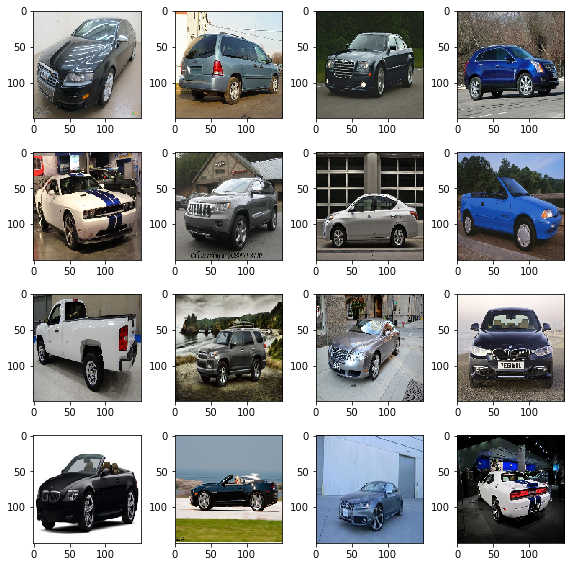

In [56]:
w=8
h=8
fig=plt.figure(figsize=(w, h))
columns = 4
rows = 4
fig_list= []

for i in range(1, columns*rows +1):
    rand1 = np.random.randint(196)
    rand2 = np.random.randint(32)
    fig_list.append(fig.add_subplot(rows, columns, i))
    temp = glob.glob("%s/*.jpg" %train_folder[rand1])
    img = load_img(temp[rand2],target_size=(150,150))
    plt.imshow(img)
    
plt.tight_layout(True)   
plt.show()

### Data augmentation

In [73]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest",
                              validation_split=0.2) # set validation split

image_gen.flow_from_directory("car_data/train/")

Found 8144 images belonging to 196 classes.


### Create a model with pre-trained mobilenet layers

In [59]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [60]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Input
mobilenet_model =MobileNetV2(weights="imagenet", include_top=True)

In [61]:
mobilenet_model.layers.pop()
mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [76]:
model = Sequential()

In [77]:
model.add(mobilenet_model)

model.add(Dense(196, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

checkpoint_filepath = 'best_weights.h5'

my_checkpointer = ModelCheckpoint(filepath=checkpoint_filepath,
                               verbose=1, save_best_only=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1000)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 196)               196196    
Total params: 2,454,180
Trainable params: 2,420,068
Non-trainable params: 34,112
_________________________________________________________________


In [78]:
input_shape=(224,224,3)

batch_size = 8

train_image_gen = image_gen.flow_from_directory("car_data/train/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="categorical",
                                                subset="training")

valid_image_gen = image_gen.flow_from_directory("car_data/train/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="categorical",
                                                subset="validation")

Found 6598 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.


In [79]:
result=model.fit_generator(train_image_gen,epochs=20,steps_per_epoch=len(train_image_gen),
                           callbacks=[my_checkpointer],verbose=1)

Epoch 1/20
 23/825 [..............................] - ETA: 58:13 - loss: 5.2755 - accuracy: 0.0217

KeyboardInterrupt: 